# Part 1

In [258]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns


In [239]:
login = pd.read_json('logins.json')

In [240]:
login.dtypes

login_time    datetime64[ns]
dtype: object

In [241]:
login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [242]:
login['count'] = 1
login.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [243]:
df = login.set_index('login_time')
day_min_interval = df.resample('15T').sum()

In [335]:
day_min_interval['month'] = day_min_interval.index.month
day_min_interval['weekday_name'] = day_min_interval.index.weekday_name
day_min_interval['weekday'] = day_min_interval.index.weekday
day_min_interval['time'] = day_min_interval.index.time
day_min_interval['hour'] = day_min_interval.index.hour

In [336]:
day_min_interval.head()

,count,month,weekday_name,time,hour,weekday
login_time,,,,,,
1970-01-01 20:00:00,2,1,Thursday,20:00:00,20,3
1970-01-01 20:15:00,6,1,Thursday,20:15:00,20,3
1970-01-01 20:30:00,9,1,Thursday,20:30:00,20,3
1970-01-01 20:45:00,7,1,Thursday,20:45:00,20,3
1970-01-01 21:00:00,1,1,Thursday,21:00:00,21,3


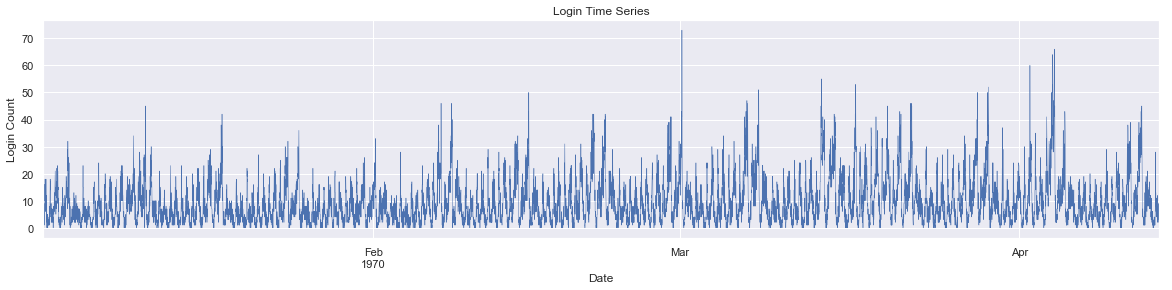

In [321]:
_ = day_min_interval['count'].plot(linewidth=0.5)
_ = plt.title('Login Time Series')
_ = plt.xlabel('Date') 
_ = plt.ylabel('Login Count')
plt.show()

Throughout the time series plot we see spikes throughout. This will be further investigated.

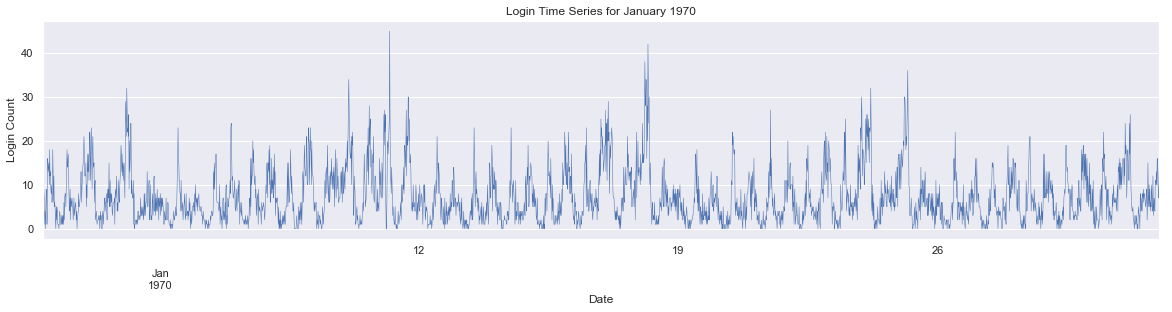

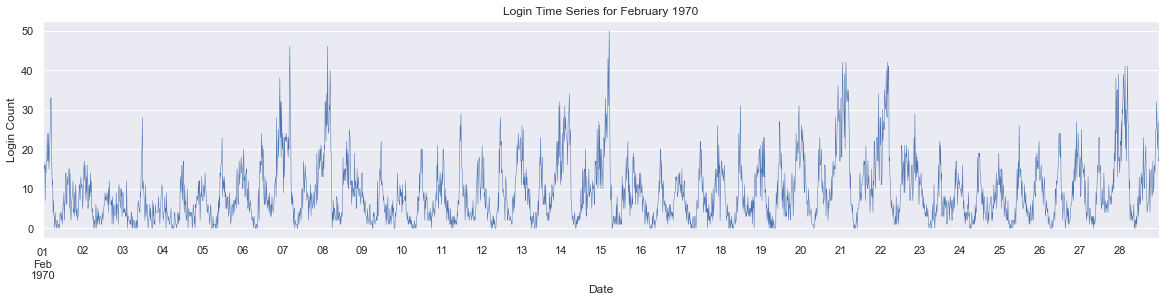

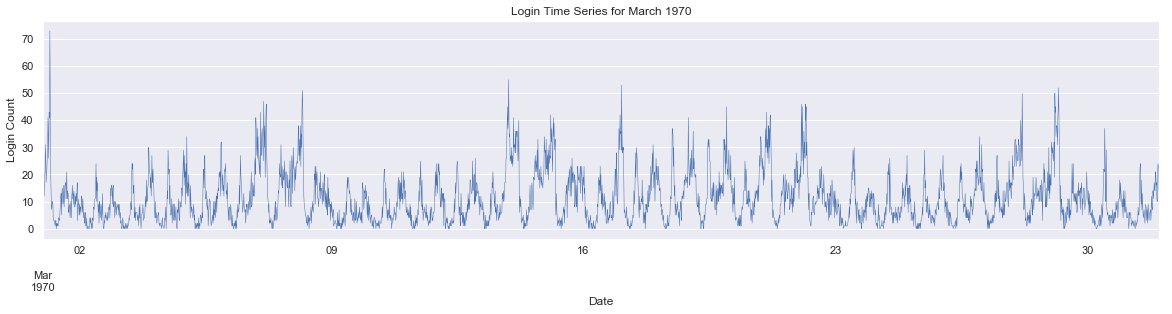

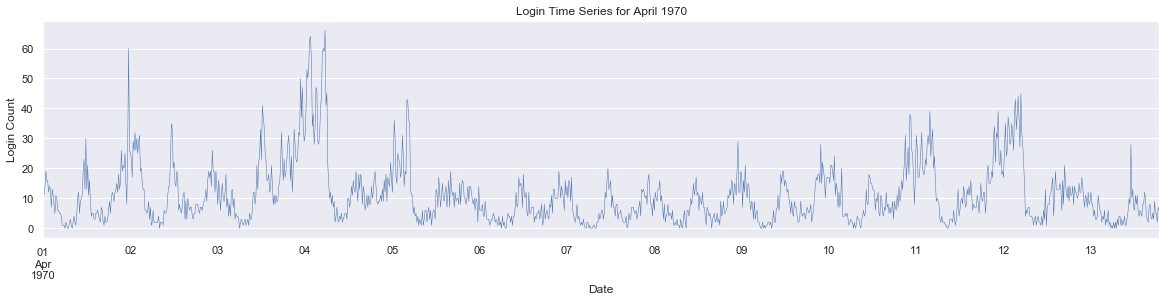

In [346]:
_ = day_min_interval['count'].loc['1970-01'].plot(linewidth=0.5)
_ = plt.title('Login Time Series for January 1970')
_ = plt.xlabel('Date') 
_ = plt.ylabel('Login Count')
plt.show()

_ = day_min_interval['count'].loc['1970-02'].plot(linewidth=0.5)
_ = plt.title('Login Time Series for February 1970')
_ = plt.xlabel('Date') 
_ = plt.ylabel('Login Count')
plt.show()

_ = day_min_interval['count'].loc['1970-03'].plot(linewidth=0.5)
_ = plt.title('Login Time Series for March 1970')
_ = plt.xlabel('Date') 
_ = plt.ylabel('Login Count')
plt.show()

_ = day_min_interval['count'].loc['1970-04'].plot(linewidth=0.5)
_ = plt.title('Login Time Series for April 1970')
_ = plt.xlabel('Date') 
_ = plt.ylabel('Login Count')
plt.show()

We can see that throughout each month, certain days have an increase in activity.

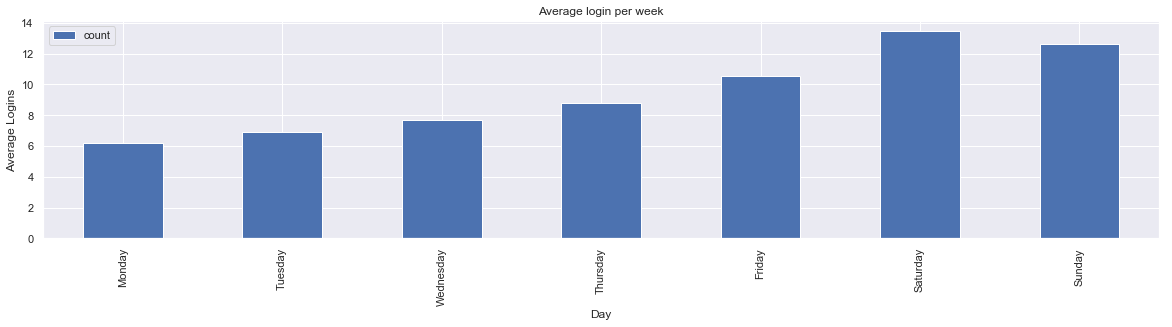

In [380]:
#day_order =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#_ = day_min_interval.loc[day_order]
_ = day_min_interval[['weekday','count']].groupby('weekday').mean().plot(kind='bar')
_ = plt.title('Average login per week')
_ = plt.xlabel('Day')
_ = plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
_ = plt.ylabel('Average Logins')
plt.show()

On average, there is a rise in usage throughout the week. Monday has the lowest usage and the login count increases until it reaches it's highest on the weekend.

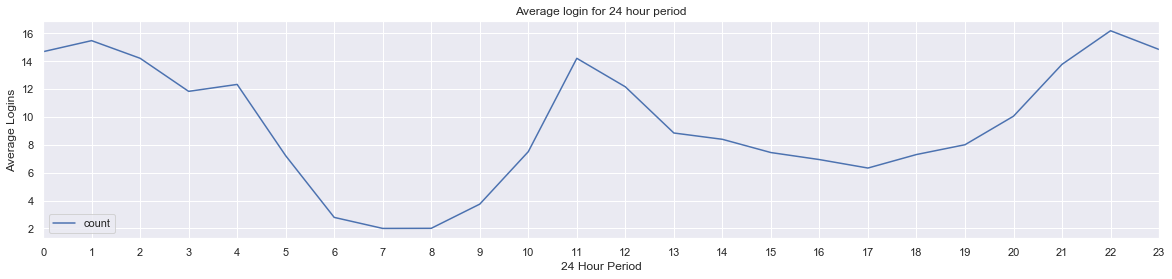

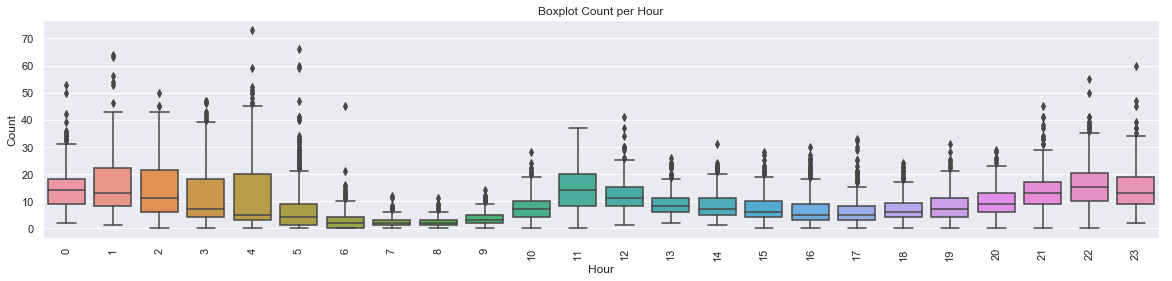

In [379]:
_ = day_min_interval[['hour','count']].groupby('hour').mean().plot(xticks=np.arange(0,24, step=1))
_ = plt.title('Average login for 24 hour period')
_ = plt.xlabel('24 Hour Period')
_ = plt.ylabel('Average Logins')
plt.show()

box = sns.boxplot(data=day_min_interval, x='hour', y='count')
_ = box.set_xticklabels(box.get_xticklabels(), rotation=90)
_ = plt.title('Boxplot Count per Hour')
_ = plt.xlabel('Hour')
_ = plt.ylabel('Count')
plt.show()

Activity tends to rise around lunch and late evening hours. The early morning from 5 to 9AM have the lowest activity.

# Part 2

1. Key measures to track for this would be profit. Is profit greater when reimbursing all toll costs or not?
2. We could use A/B Testing, in which 1 set of the population gets all toll costs reimbursed and the other set does not. Have this run for awhile and check to see if profit from one is greather than the other. We could us a t-test to verify the significance of the observation. If profits are greater for those that are reimbursed, then that means that reimbursement for tolls actually works and should be applied to everyone. If profits are lower, then reimbursement of tolls was not much of a motivating factor. If profits are the same, then maybe the experiment should last longer to see if anything changes.

# Part 3

In [392]:
file = open('ultimate_data_challenge.json', 'r')
ultimate = pd.DataFrame(json.load(file))
file.close()

In [393]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [394]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [396]:
 ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [395]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


signup_date and last_trip_date will be converted from object to datetime. There's some missing values for avg_rating_of_driver, phone, and avg_rating_by_driver that will need to be taken care of. Avg_rating_of_driver/avg_rating_by_driver will have the NaN filled with the mean. Phone will be filled with the most common phone.

In [401]:
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])

In [405]:
ultimate['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [426]:
ultimate['phone'] = ultimate['phone'].fillna('iPhone')
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(ultimate['avg_rating_by_driver'].mean())
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(ultimate['avg_rating_of_driver'].mean())

In [427]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


Per the problem, a user is considered 'retained' if they have used Ultimate within the last 30 days of the last date of 'last_trip_date'. I will find the latest date in this column and identify users who have used Ultimate within the last 30 days of this date and will mark them as 'retained', or 0.

In [650]:
retention_date = ultimate['last_trip_date'].max() - pd.Timedelta('30 days')

ultimate['user_retention'] = (ultimate['last_trip_date'] >= retention_date).astype(int)
ultimate['ultimate_black_user'] = ultimate['ultimate_black_user'].astype(int)
    

In [651]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [531]:
ultimate['user_retention'].value_counts()

0    31196
1    18804
Name: user_retention, dtype: int64

In [757]:
print('Observed Users Retained:', len(ultimate[ultimate['user_retention']==1])/len(ultimate)*100)

Observed Users Retained: 37.608000000000004


We see that there are a lot of users who have not been retained.

In [558]:
android = ultimate[ultimate['phone']=='Android']['user_retention'].value_counts()
iphone = ultimate[ultimate['phone']=='iPhone']['user_retention'].value_counts()

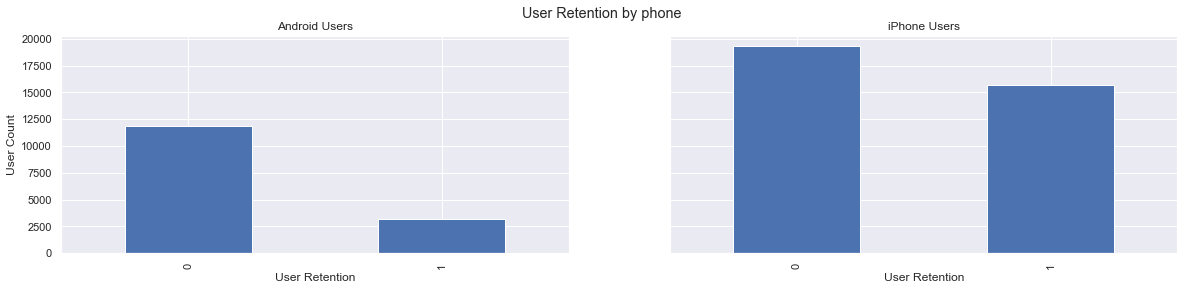

In [636]:
f, ax = plt.subplots(1, 2, sharey=True)

android.plot(ax=ax[0], kind='bar')
iphone.plot(ax=ax[1], kind='bar')
ax[0].set_title('Android Users')
ax[0].set_xlabel('User Retention')
ax[0].set_ylabel('User Count')
ax[1].set_title('iPhone Users')
ax[1].set_xlabel('User Retention')
f.suptitle('User Retention by phone')
plt.show()

The plot shows that there are more iPhone users than Android users but when it comes to which users are being retained, it looks like iPhone users are usually keep using Ultimate.

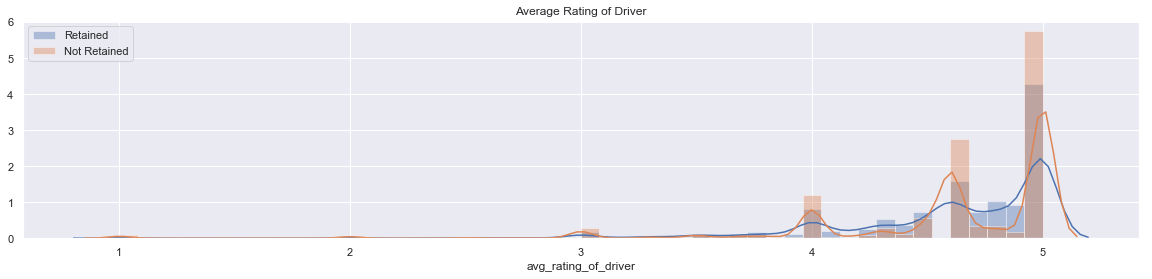

In [795]:
_ = sns.distplot(ultimate['avg_rating_of_driver'][ultimate['user_retention']==1], label='Retained')
_ = sns.distplot(ultimate['avg_rating_of_driver'][ultimate['user_retention']==0], label='Not Retained')
_ = plt.legend()
_ = plt.title('Average Rating of Driver')
plt.show()

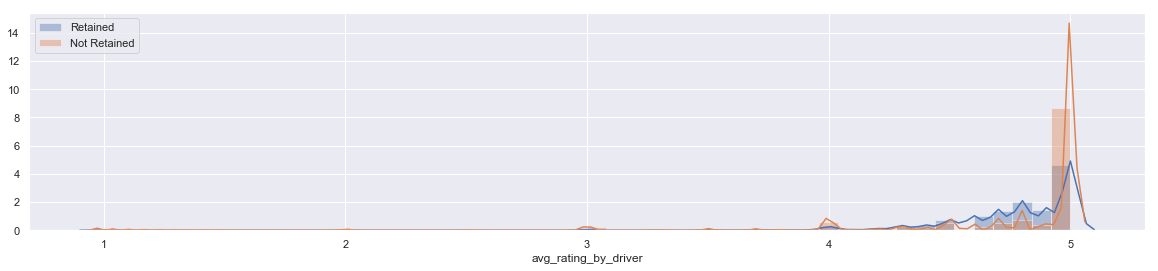

In [794]:
_ = sns.distplot(ultimate['avg_rating_by_driver'][ultimate['user_retention']==1], label='Retained')
_ = sns.distplot(ultimate['avg_rating_by_driver'][ultimate['user_retention']==0], label='Not Retained')
_ = plt.legend()
plt.show()

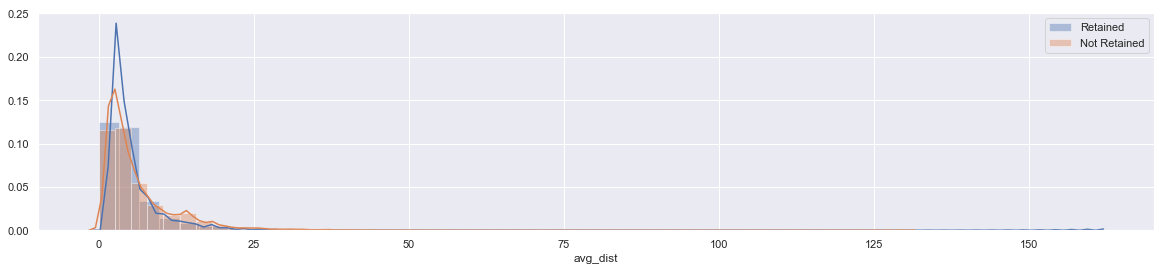

In [796]:
_ = sns.distplot(ultimate['avg_dist'][ultimate['user_retention']==1], label='Retained')
_ = sns.distplot(ultimate['avg_dist'][ultimate['user_retention']==0], label='Not Retained')
_ = plt.legend()
plt.show()

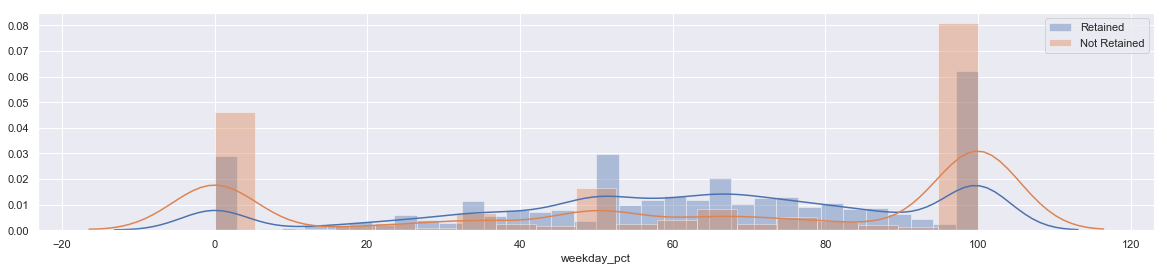

In [797]:
_ = sns.distplot(ultimate['weekday_pct'][ultimate['user_retention']==1], label='Retained')
_ = sns.distplot(ultimate['weekday_pct'][ultimate['user_retention']==0], label='Not Retained')
_ = plt.legend()
plt.show()

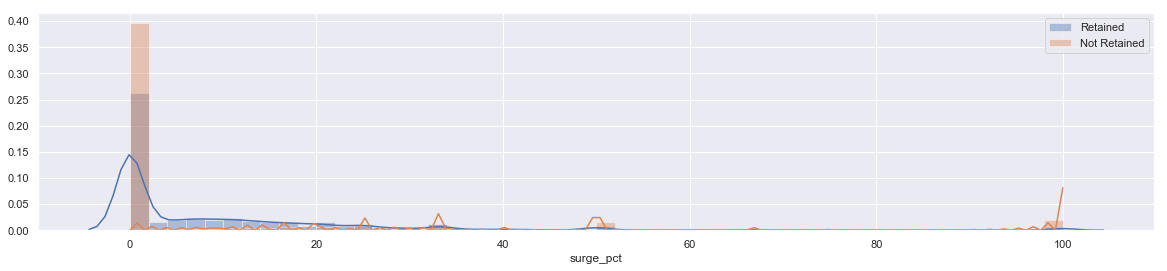

In [798]:
_ = sns.distplot(ultimate['surge_pct'][ultimate['user_retention']==1], label='Retained')
_ = sns.distplot(ultimate['surge_pct'][ultimate['user_retention']==0], label='Not Retained')
_ = plt.legend()
plt.show()

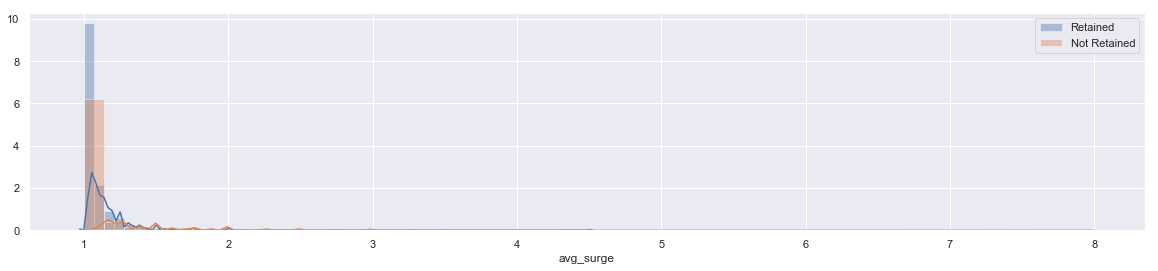

In [800]:
_ = sns.distplot(ultimate['avg_surge'][ultimate['user_retention']==1], label='Retained')
_ = sns.distplot(ultimate['avg_surge'][ultimate['user_retention']==0], label='Not Retained')
_ = plt.legend()
plt.show()

In [821]:
ultimate.corr()['user_retention'].sort_values(ascending=False)

user_retention            1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
avg_dist                 -0.092780
Name: user_retention, dtype: float64

Here we see positive and negative correlations to user retention.

#### Data Preprocessing

In [675]:
#Create dummy for city and phone
cat_dummy = pd.get_dummies(ultimate[['city', 'phone']])

In [676]:
new_df = pd.concat([ultimate, cat_dummy], axis=1)

In [677]:
new_df = new_df.drop(columns = ['phone', 'city', 'signup_date', 'last_trip_date'])

In [762]:
new_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_retention,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0


In [807]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [808]:
features = new_df.drop(columns='user_retention')
target = new_df['user_retention']

In [809]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=34)
X_train.shape

(35000, 13)

#### Machine Learning Model

In [810]:
dummy = DummyClassifier(random_state=34)
dummy.fit(X_train, y_train)
print('Baseline Model Accuracy Score:', dummy.score(X_test, y_test))

Baseline Model Accuracy Score: 0.5346666666666666


In [811]:
rf = RandomForestClassifier(random_state=34)
lr = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=34))

cv_rf = cross_val_score(rf, X_train, y_train, cv=5)
cv_lr = cross_val_score(lr, X_train, y_train, cv=5)

print('Average CV Score RF:', cv_rf.mean())
print('Average CV Score LR:', cv_lr.mean())

Average CV Score RF: 0.7552857142857143
Average CV Score LR: 0.7157428571428571


RandomForestClassifier performed the best with a score of 75.5%

In [814]:
%%time
param_grid = {'n_estimators': [50, 100, 200, 500],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': [5, 15, 30, None]}

rf_grid = GridSearchCV(rf, param_grid = param_grid, cv=5)
rf_grid.fit(X_train, y_train)

CPU times: user 22min 59s, sys: 29.1 s, total: 23min 28s
Wall time: 23min 42s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=34,
                                  

In [815]:
rf_predict = rf_grid.predict(X_test)

print('Best Score:', rf_grid.best_score_)
print('Best Parameter:', rf_grid.best_params_)
print('Test Score:', accuracy_score(y_test, rf_predict))
print(classification_report(y_test, rf_predict))
print(confusion_matrix(y_test, rf_predict))

Best Score: 0.7786857142857142
Best Parameter: {'max_depth': 15, 'max_features': 'auto', 'n_estimators': 500}
Test Score: 0.7775333333333333
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      9270
           1       0.73      0.66      0.69      5730

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.77      0.78      0.78     15000

[[7882 1388]
 [1949 3781]]


After tuning, the best RandomForestClassifier model had a score of 77.9% with max_depth=15, max_features=auto, and n_estimators=500

#### Feature Importance

In [817]:
importance = rf_grid.best_estimator_.feature_importances_

In [818]:
feature_importance = pd.DataFrame(list(zip(features.columns, importance)), columns=['Features', 'Importance'])

In [819]:
feature_importance.sort_values(by='Importance', ascending=False).head(5)

,Features,Importance
6,avg_dist,0.190019
7,avg_rating_by_driver,0.137713
5,weekday_pct,0.131456
3,surge_pct,0.099408
2,avg_surge,0.082945


Average distance, average rating by driver, weekday percent, surge percent, and average surge precent are the top 5 important features of this data set.



In order to retain users, Ultimate could do the following:
1. Offer specials to users for weekday use.
2. Offer specials to users who travel a certain amount of distance.
3. Encourage Ultimate drivers to rate the user.